<hr style="height:10px"> 
 
<div class='container2'>
	<div style='padding: 0 7em 2em 0em;'>
	<h1>Trabalho de Inteligência Artificial</h1>
    <h3> <a href="https://github.com/amandakouchi">Amanda Kouchi</a> &#x25CF; <a href="https://github.com/biarog">Beatriz Rogers</a> &#x25CF; <a href="https://github.com/matteoavan">Matteo Savan</a> &#x25CF; <a href="https://github.com/RaulYKomai">Raul Y. Komai</a>
	</div>
</div>


 <hr style="height:5px"> 

    
<h2>Algoritmos e Avaliação em Agrupamento</h2>

## Introdução

Neste *notebook*, será feito o uso de três algoritmos de agrupamento para podermos analisar cada um dos algorítmos e seus usos ideais. O banco de dados utilizado foi providenciado pela nossa Profª Drª Katti Facelli.

Os três algoritmos que faremos uso neste estudo são os seguintes: K-médias, Single-Link e Complete-Link.

---

## Recursos Necessários

Para este *notebook*, deve ser utilizado o `Python 3.6` ou superior com as seguintes bibliotecas externas, que deverão ser instaladas:

* [`matplotlib`](versão 3.9.2 ou superior): construção e exibição de gráficos variados
* [`numpy`](versão 2.1 ou superior): manipulação de dados em formato de vetores e matrizes
* [`pandas`](versão 2.2.2 ou superior): manipulação de dados em formato de tabelas
* [`sklearn`](versão x.x ou superior): completar
* [`seaborn`]versão x.x ou superior): completar

A biblioteca [`os`](https://docs.python.org/3/library/os.html), para realizar tarefas específicas ao Sistema Operacional, também será utilizada. Por fazer parte da [Biblioteca Padrão de Python](https://docs.python.org/pt-br/3/library/), sua instalação não é necessária.

Serão utilizados também os conjuntos de dados disponibilizados junto com este *notebook*, que se encontram no diretório `datasets`, em formato de arquivo `.csv`.

In [1]:
## Imports
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

%matplotlib inline

DATASETS_DIR = 'datasets'

## K-médias

In [2]:
## Função auxiliar
def load_dataset(dataset_name):
    dataset = pd.read_csv(os.path.join(DATASETS_DIR, dataset_name+'.txt'), sep='\t', index_col = 0)
    return dataset

In [32]:
## Entrada de dados
maxiter = 100000
k = 10
nome_arquivo = 'monkey'

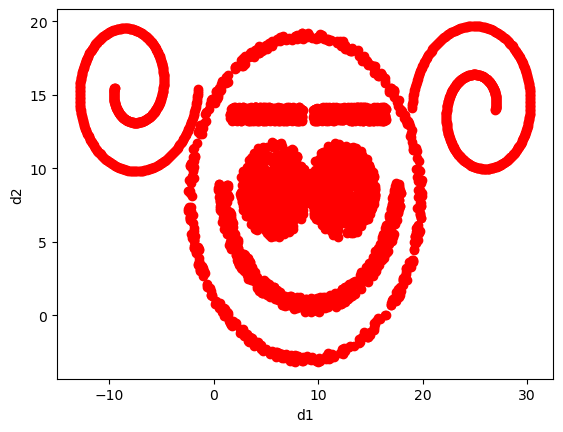

In [33]:
## Plot dos dados de entrada
dados = load_dataset(nome_arquivo)
X = dados[['d1', 'd2']]
plt.scatter(X["d1"],X["d2"], c="red")
plt.xlabel("d1")
plt.ylabel("d2")
plt.show()

In [34]:
## Execução do k-médias
kmedias_ = KMeans(n_clusters=k, max_iter = maxiter)
kmedias = kmedias_.fit_predict(dados[['d1', 'd2']])

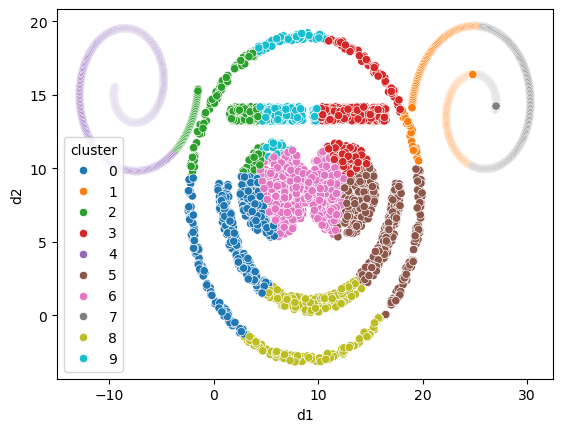

In [35]:
## Plotar após k-médias
df = pd.DataFrame(dados)
df.columns = ["d1","d2"]
df["cluster"] = kmedias
cores = sns.color_palette()[0:k]
df = df.sort_values("sample_label")
sns.scatterplot(data = df, x=df["d1"], y=df["d2"], hue=df["cluster"], palette=cores)
plt.show()

In [36]:
## Exportar arquivo
select_ = ['sample_label', 'cluster']
select = [x for x in df.columns if x in select_]
export = df[select]
export.to_csv(nome_arquivo + '_k-media'  + '.csv')